In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [23]:
class_colors_combined = {
    0: ('#D3D3D3', 'No Class', '(nan)', 'Band 01'),  # Light grey
    101: ('#006400', 'Broadleaved Woodland', 'C101', 'Band 02'),  # Dark green
    102: ('#008000', 'Coniferous Woodland', 'C102', 'Band 03'),  # Green
    103: ('#808000', 'Scrub', 'C103', 'Band 04'),  # Olive
    104: ('#A52A2A', 'Felled/Young Trees', 'C104', 'Band 05'),  # Brown
    201: ('#800080', 'Heather Moorland', 'D201', 'Band 06'),  # Purple
    202: ('#DDA0DD', 'Upland Grass Moor', 'D202', 'Band 07'),  # Plum
    203: ('#FFFF00', 'Bracken', 'D203', 'Band 08'),  # Yellow
    204: ('#FFD700', 'Mosaic', 'D204', 'Band 09'),  # Gold
    504: ('#FF0000', 'Rush Pasture', 'E504', 'Band 26'),  # Red
    302: ('#90EE90', 'Improved Grassland', 'E302', 'Band 13'),  # Light green
    303: ('#32CD32', 'Rough Grassland', 'E303', 'Band 14'),  # Lime green
    401: ('#0000FF', 'River', 'OS401', 'Band 15'),  # Blue
    402: ('#00FFFF', 'Lake', 'OS402', 'Band 16'),  # Cyan
    403: ('#ADD8E6', 'Pond', 'OS403', 'Band 17'),  # Light blue
    404: ('#808080', 'Suburban', 'OS404', 'Band 18'),  # Grey
    405: ('#808080', 'Cemeteries', 'OS405', 'Band 19'),  # Grey (same as Suburban)
    406: ('#90EE90', 'Playing Fields', 'OS406', 'Band 20'),  # Light green (same as Improved Grassland)
    407: ('#000000', 'Railway Verges', 'OS407', 'Band 21'),  # Black
    408: ('#000000', 'Railway', 'OS408', 'Band 22'),  # Black
    409: ('#000000', 'Road', 'OS409', 'Band 23'),  # Black
    410: ('#808080', 'Road Verges', 'OS410', 'Band 24'),  # Grey (same as Suburban)
    411: ('#000000', 'Dense Urban', 'OS411', 'Band 25'),  # Black
    205: ('#FF00FF', 'Heather Moorland on blanket bog/deep peat', 'D205', 'Band 10'),  # Magenta
    206: ('#FF1493', 'Upland Grass Moor on blanket bog/deep peat', 'D206', 'Band 11'), # Deep pink
    207: ('#FF69B4', 'Mosaic on blanket bog/deep peat', 'D207', 'Band 12')            # Hot pink
}


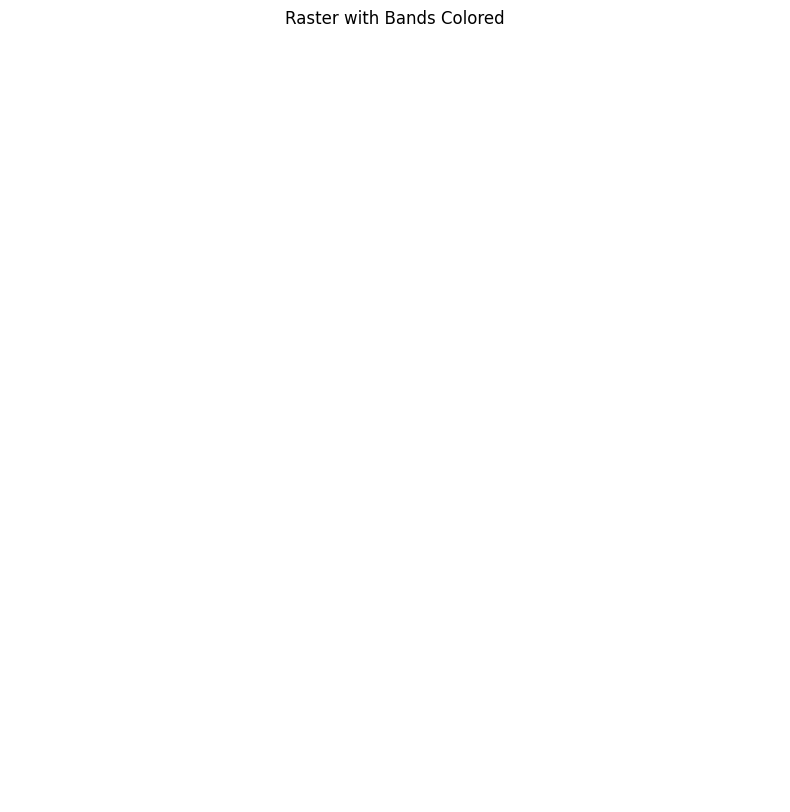

In [28]:
# Load the combined raster
combined_raster_path = "../output_model/nlees_lcm_12pt5_rgb_reduce_1x1/SK1978_combined.tif"
with rasterio.open(combined_raster_path) as src:
    combined_data = src.read()

# Create a new figure for the raster plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each band with the corresponding color
for band in range(combined_data.shape[0]):
    band_data = combined_data[band]
    band_color = class_colors_combined.get(band + 1, ('#FFFFFF', 'Unknown'))[0]  # Default to white if band not found
    cmap = ListedColormap([band_color])
    ax.imshow(band_data, cmap=cmap, alpha=0.5)

# Add title and axis labels
ax.set_title("Raster with Bands Colored")
ax.axis("off")

# Show the plot
plt.show()